# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVR # library for SVR model training 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from binance import *
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer  
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "BTC"
cryptoPair = "USDT"

trainTestSplit = 0.8

# ------------------------------------------------------------------------------------------------------

### Loading dataset price data

In [3]:
api_key = '//' 
api_secret = '//'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
data = pd.DataFrame(klines)
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data=data[['close']]
data.head()
data = data.iloc[:-1 , :]

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [4]:
data.head() # showing the first 5 rows of data

,close
2021-01-01 03:59:59.999,29278.40000000
2021-01-01 07:59:59.999,29092.83000000
2021-01-01 11:59:59.999,29313.49000000
2021-01-01 15:59:59.999,29188.67000000
2021-01-01 19:59:59.999,29029.04000000


### Five last records of data

In [5]:
data.tail() # showing the last 5 rows of data

,close
2021-12-31 07:59:59.999,47191.09000000
2021-12-31 11:59:59.999,47975.76000000
2021-12-31 15:59:59.999,48005.37000000
2021-12-31 19:59:59.999,45728.28000000
2021-12-31 23:59:59.999,46216.93000000


### Coloumns/features in data

In [6]:
data.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [7]:
print('lenght of data is', len(data)) #lenght of data

lenght of data is 2190


### Counts of missing values in each column

In [8]:
data.isnull().sum() #checking the null values columns wise 

close    0
dtype: int64

In [9]:
#priceData['open']=priceData['open'].astype(float)
#priceData['high']=priceData['high'].astype(float)
#priceData['low']=priceData['low'].astype(float)
data['close']=data['close'].astype(float)

### Spliting date into day, month and year

In [10]:
data['date'] = data.index # taking dates in date column 
data.sort_index(ascending=True, inplace=True)
data['Month'] = data['date'].dt.month # extracting months from data
data['Day'] = data['date'].dt.day # extracting day from data
data['Year'] = data['date'].dt.year # extracting year from data
data['Hour'] = data['date'].dt.hour # extracting year from data
data['Minutes'] = data['date'].dt.minute # extracting year from data

In [11]:
data.head()

,close,date,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,29278.40,2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,29092.83,2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,29313.49,2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,29188.67,2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,29029.04,2021-01-01 19:59:59.999,1,1,2021,19,59


### Close price with respect to year 

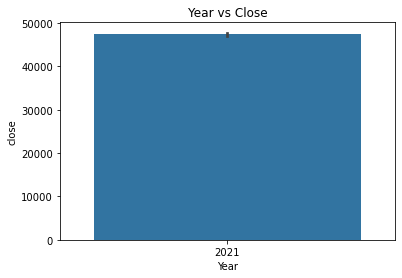

In [12]:
sns.barplot(x='Year', y='close', data=data).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

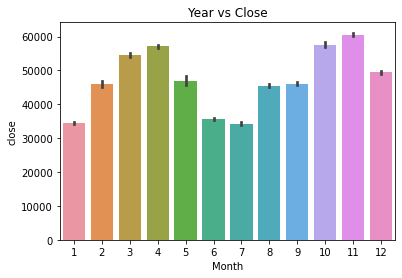

In [13]:
sns.barplot(x='Month', y='close', data=data).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

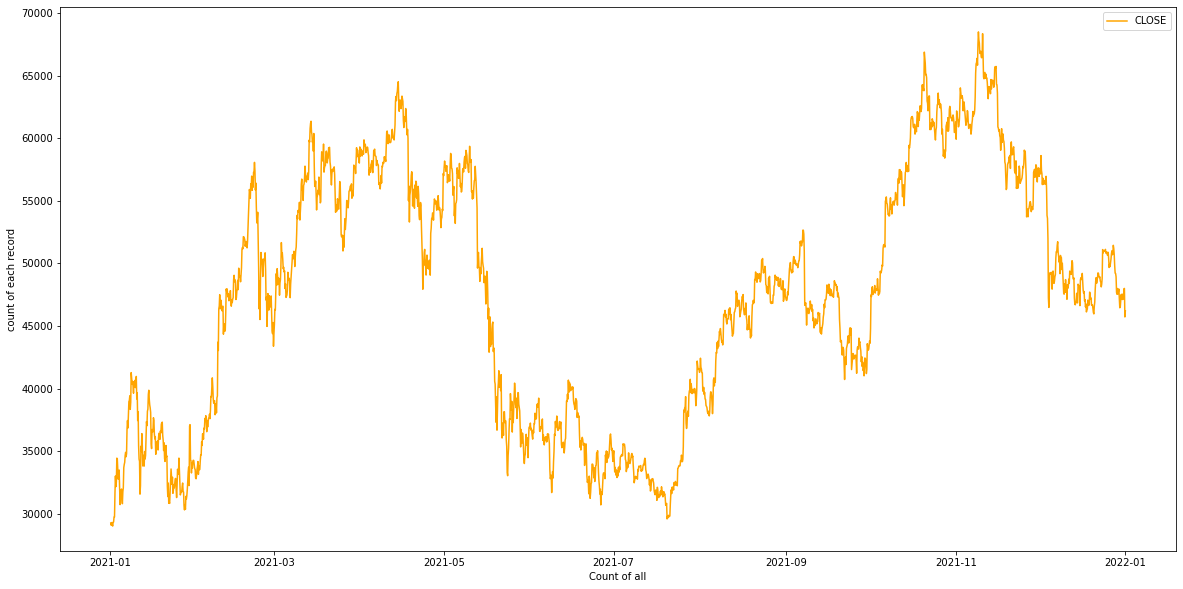

In [14]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(data.index, data['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [15]:
X=data.drop(columns=['close','date']) #dropping the 'Close','date'
X #input features 

,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,1,1,2021,19,59
...,...,...,...,...,...
2021-12-31 07:59:59.999,12,31,2021,7,59
2021-12-31 11:59:59.999,12,31,2021,11,59
2021-12-31 15:59:59.999,12,31,2021,15,59
2021-12-31 19:59:59.999,12,31,2021,19,59


### Taking target as output

In [16]:
y=data['close'] # output close 
y #output 

2021-01-01 03:59:59.999    29278.40
2021-01-01 07:59:59.999    29092.83
2021-01-01 11:59:59.999    29313.49
2021-01-01 15:59:59.999    29188.67
2021-01-01 19:59:59.999    29029.04
                             ...   
2021-12-31 07:59:59.999    47191.09
2021-12-31 11:59:59.999    47975.76
2021-12-31 15:59:59.999    48005.37
2021-12-31 19:59:59.999    45728.28
2021-12-31 23:59:59.999    46216.93
Name: close, Length: 2190, dtype: float64

### Spliting the data into training and Testing

In [17]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 



y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

In [18]:
X_train.head()

,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,1,1,2021,19,59


In [19]:
X_test.head()

,Month,Day,Year,Hour,Minutes
2021-10-20 04:59:59.999,10,20,2021,4,59
2021-10-20 08:59:59.999,10,20,2021,8,59
2021-10-20 12:59:59.999,10,20,2021,12,59
2021-10-20 16:59:59.999,10,20,2021,16,59
2021-10-20 20:59:59.999,10,20,2021,20,59


In [20]:
y_train.head()

2021-01-01 03:59:59.999    29278.40
2021-01-01 07:59:59.999    29092.83
2021-01-01 11:59:59.999    29313.49
2021-01-01 15:59:59.999    29188.67
2021-01-01 19:59:59.999    29029.04
Name: close, dtype: float64

# --------------------------------------------------------------------------------------------------

# ARIMA Model

### Parametrs

In [21]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train_data, test_data, arima_order):
    # make predictions
    model = smapi.tsa.arima.ARIMA(train_data, order=arima_order)
    fitted = model.fit()
    preds = fitted.forecast(len(test_data), alpha=0.05)  # 95% conf
    #predSeries = pd.Series(preds.tolist(), index = test_data.index)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data, preds.tolist()))
    print(rmse)
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train_data, test_data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train_data,test_data, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
# evaluate parameters
train_data, test_data = data['close'].iloc[3:int(len(data['close'])*trainTestSplit)], data['close'].iloc[int(len(data['close'])*trainTestSplit):]
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(train_data, test_data, p_values, d_values, q_values)

12621.714448441477
ARIMA(0, 0, 0) RMSE=12621.714
12599.543702550742
ARIMA(0, 0, 1) RMSE=12599.544
12584.284582003185
ARIMA(0, 0, 2) RMSE=12584.285
10483.973101648062
ARIMA(0, 1, 0) RMSE=10483.973
10472.094598456899
ARIMA(0, 1, 1) RMSE=10472.095
10552.538606961949
ARIMA(0, 1, 2) RMSE=10552.539
36344.81433918712
ARIMA(0, 2, 0) RMSE=36344.814
17184.782005916815
ARIMA(0, 2, 1) RMSE=17184.782
17142.14804775484
ARIMA(0, 2, 2) RMSE=17142.148
3737.5619129912075
ARIMA(1, 0, 0) RMSE=3737.562
3761.326659975796
ARIMA(1, 0, 1) RMSE=3761.327
3865.916027282446
ARIMA(1, 0, 2) RMSE=3865.916
10478.448907301834
ARIMA(1, 1, 0) RMSE=10478.449
10494.690346217676
ARIMA(1, 1, 1) RMSE=10494.690
10582.153099810042
ARIMA(1, 1, 2) RMSE=10582.153
179204.5425259478
ARIMA(1, 2, 0) RMSE=179204.543
17142.056273999133
ARIMA(1, 2, 1) RMSE=17142.056
17155.246269394876
ARIMA(1, 2, 2) RMSE=17155.246
3994.683881342052
ARIMA(2, 0, 0) RMSE=3994.684
3941.4172896703863
ARIMA(2, 0, 1) RMSE=3941.417
3732.4800538543254
ARIMA(2, 0,

In [22]:
train_data, test_data = data['close'].iloc[3:int(len(data['close'])*trainTestSplit)], data['close'].iloc[int(len(data['close'])*trainTestSplit):]
#Modeling
# Build Model
model = smapi.tsa.arima.ARIMA(train_data, order=(best_cfg))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1749
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -14269.901
Date:                Mon, 09 May 2022   AIC                          28551.802
Time:                        21:20:44   BIC                          28584.603
Sample:                             0   HQIC                         28563.927
                               - 1749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.521e+04   5403.941      8.366      0.000    3.46e+04    5.58e+04
ar.L1          1.2032      0.299      4.020      0.000       0.617       1.790
ar.L2         -0.2055      0.298     -0.689      0.4

In [23]:
preds = fitted.forecast(len(test_data), alpha=0.05)  # 95% conf
predSeries = pd.Series(preds.tolist(), index = test_data.index)

In [24]:
predSeries

2021-10-20 04:59:59.999    64320.275749
2021-10-20 08:59:59.999    64306.622691
2021-10-20 12:59:59.999    64259.990217
2021-10-20 16:59:59.999    64206.688751
2021-10-20 20:59:59.999    64152.139398
                               ...     
2021-12-31 07:59:59.999    50681.692823
2021-12-31 11:59:59.999    50665.878775
2021-12-31 15:59:59.999    50650.110443
2021-12-31 19:59:59.999    50634.387696
2021-12-31 23:59:59.999    50618.710401
Length: 438, dtype: float64

# Evaluation Measures on Test data

# MSE

In [25]:
y_pred_test=preds.tolist() # tetsing trained model on test data
test_mse1=mean_squared_error(test_data.tolist(),y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  13931407.35242


# MAE

In [26]:
test_MAE1=mean_absolute_error(test_data.tolist(),y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  3045.5597


# RMSE

In [27]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  3732.48005


# MAPE

In [28]:
test_mape1=mean_absolute_percentage_error(test_data.tolist(),y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.05539


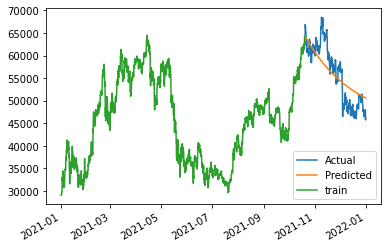

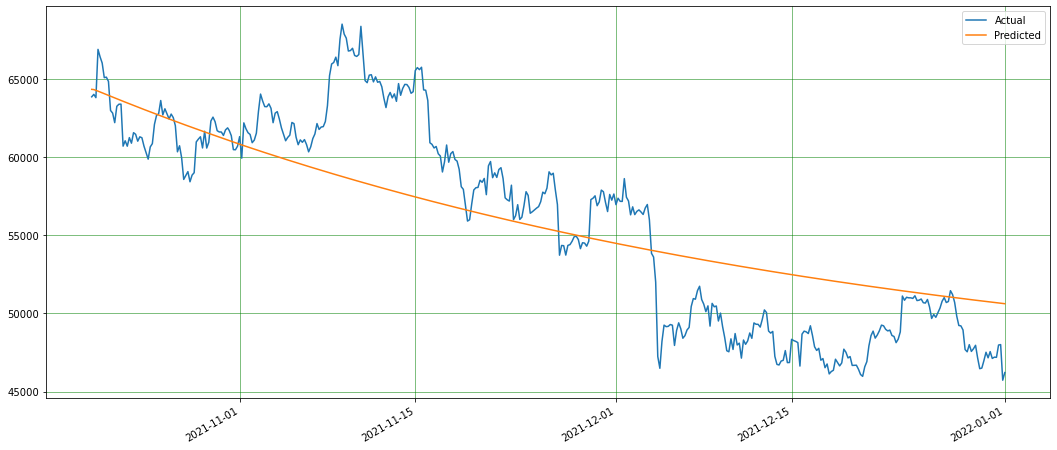

In [29]:
df = pd.DataFrame({'Actual': test_data, 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# SARIMAX Model

### Parametrs

In [30]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=9638.724
ARIMA(0, 0, 1) RMSE=11353.086
ARIMA(0, 0, 2) RMSE=9024.063
ARIMA(0, 1, 0) RMSE=17184.882
ARIMA(0, 1, 1) RMSE=17110.017
ARIMA(0, 1, 2) RMSE=17273.792
ARIMA(0, 2, 0) RMSE=105222.289
ARIMA(0, 2, 1) RMSE=12321.569
ARIMA(0, 2, 2) RMSE=12470.810
ARIMA(1, 0, 0) RMSE=10532.407
ARIMA(1, 0, 1) RMSE=11219.791
ARIMA(1, 0, 2) RMSE=10281.379
ARIMA(1, 1, 0) RMSE=17121.160
ARIMA(1, 1, 1) RMSE=17180.663
ARIMA(1, 1, 2) RMSE=18847.594
ARIMA(1, 2, 0) RMSE=65706.352
ARIMA(1, 2, 1) RMSE=12460.293
ARIMA(1, 2, 2) RMSE=12391.611
ARIMA(2, 0, 0) RMSE=10334.128
ARIMA(2, 0, 1) RMSE=5379.431
LU decomposition error.
ARIMA(2, 1, 0) RMSE=17224.833
ARIMA(2, 1, 1) RMSE=17357.568
ARIMA(2, 1, 2) RMSE=22262.864
ARIMA(2, 2, 0) RMSE=88327.692
ARIMA(2, 2, 1) RMSE=12449.724
ARIMA(2, 2, 2) RMSE=12270.679
ARIMA(4, 0, 0) RMSE=11152.166
ARIMA(4, 0, 1) RMSE=13412.316
ARIMA(4, 0, 2) RMSE=7092.604
ARIMA(4, 1, 0) RMSE=17248.957
ARIMA(4, 1, 1) RMSE=17913.643
ARIMA(4, 1, 2) RMSE=20498.832
ARIMA(4, 2, 0) RMSE

In [31]:
Xtest = data
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],order=(best_cfg),seasonal_order=(1,1,1,12))
results=model.fit()

In [32]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
predSeries = pd.Series(preds.tolist(), index = test_data.index)

### Best Parameter selected

# Evaluation Measures on Test data

# MSE

In [33]:
#y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse2=mean_squared_error(y_test,predSeries) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  28938281.04285


# MAE

In [34]:
test_MAE2=mean_absolute_error(y_test,predSeries) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  4555.6328


# RMSE

In [35]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  5379.43129


# MAPE

In [36]:
test_mape2=mean_absolute_percentage_error(y_test,predSeries) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.08481


# --------------------------------------------------------------------------------------------------

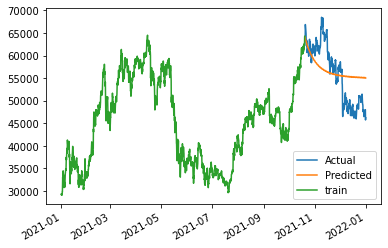

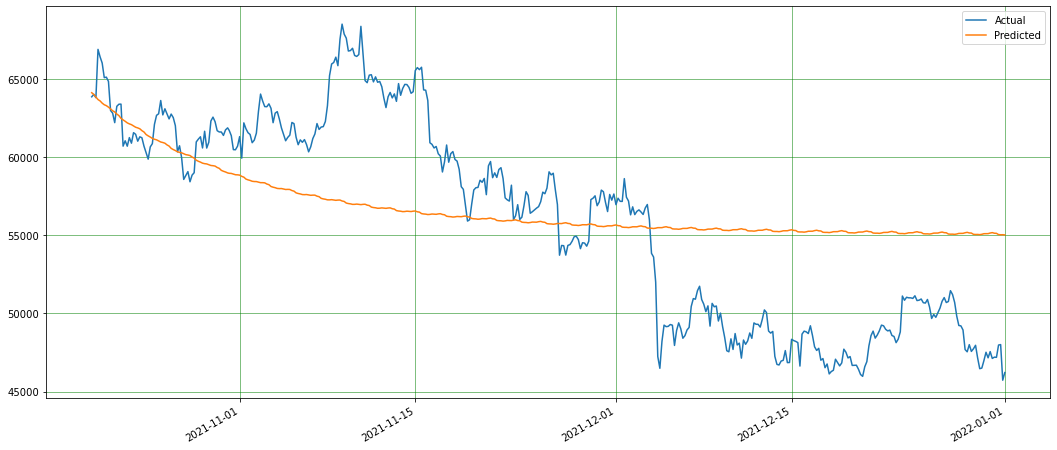

In [37]:
df = pd.DataFrame({'Actual': test_data['close'], 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data['close']})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [38]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [39]:
%%time
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 911346760.34200323
Iteration 2, loss = 903992830.45721388
Iteration 3, loss = 896602567.55927920
Iteration 4, loss = 889219485.97036302
Iteration 5, loss = 881837549.78254008
Iteration 6, loss = 874483664.24984634
Iteration 7, loss = 866991730.77498293
Iteration 8, loss = 859348977.81409681
Iteration 9, loss = 851539063.96145320
Iteration 10, loss = 843532745.49542630
Iteration 11, loss = 835228563.28349316
Iteration 12, loss = 826651939.73030448
Iteration 13, loss = 817770014.52925980
Iteration 14, loss = 808610823.77944720
Iteration 15, loss = 799047161.60904515
Iteration 16, loss = 789072348.37909949
Iteration 17, loss = 778716736.92193305
Iteration 18, loss = 767967931.64280009
Iteration 19, loss = 756830955.49501145
Iteration 20, loss = 745266514.62411118
Iteration 21, loss = 733336820.13459313
Iteration 22, loss = 721007663.98449636
Iteration 23, loss = 708308770.54623997
Iteration 24, loss = 695270136.52003872
Iteration 25, loss = 681808611.40515471
Iteration

Iteration 229, loss = 30082478.67265017
Iteration 230, loss = 30080638.35454328
Iteration 231, loss = 30080295.74272750
Iteration 232, loss = 30080975.99509788
Iteration 233, loss = 30078970.76411695
Iteration 234, loss = 30077778.05187252
Iteration 235, loss = 30076401.12027916
Iteration 236, loss = 30076877.48249314
Iteration 237, loss = 30074086.34493410
Iteration 238, loss = 30070286.42016603
Iteration 239, loss = 30069961.33649070
Iteration 240, loss = 30068049.49676104
Iteration 241, loss = 30067016.87927497
Iteration 242, loss = 30070747.18158889
Iteration 243, loss = 30065506.64590713
Iteration 244, loss = 30064021.20742949
Iteration 245, loss = 30062940.55140359
Iteration 246, loss = 30061903.38317610
Iteration 247, loss = 30060206.53184394
Iteration 248, loss = 30058297.73929314
Iteration 249, loss = 30064642.19429018
Iteration 250, loss = 30055876.72060541
Iteration 251, loss = 30056684.79322645
Iteration 252, loss = 30054197.98526798
Iteration 253, loss = 30052109.32597175


Iteration 60, loss = 228445782.86156920
Iteration 61, loss = 213462052.07527450
Iteration 62, loss = 199214570.46083447
Iteration 63, loss = 185644206.30059838
Iteration 64, loss = 172689970.25337279
Iteration 65, loss = 160523481.25797763
Iteration 66, loss = 149117628.54491788
Iteration 67, loss = 138322098.40941945
Iteration 68, loss = 128415955.89670296
Iteration 69, loss = 119058204.23652792
Iteration 70, loss = 110720691.18931486
Iteration 71, loss = 102935449.58694522
Iteration 72, loss = 95841204.38927843
Iteration 73, loss = 89482909.62543955
Iteration 74, loss = 83703256.86928035
Iteration 75, loss = 78566859.91971725
Iteration 76, loss = 73956036.85146262
Iteration 77, loss = 69855942.55265294
Iteration 78, loss = 66272653.10766015
Iteration 79, loss = 63275696.89049818
Iteration 80, loss = 60555287.06208710
Iteration 81, loss = 58232892.73894533
Iteration 82, loss = 56212556.18614987
Iteration 83, loss = 54604238.42256515
Iteration 84, loss = 53102626.15089542
Iteration 85,

Iteration 294, loss = 46543461.31874042
Iteration 295, loss = 46544473.04435350
Iteration 296, loss = 46549959.04090808
Iteration 297, loss = 46542214.88251938
Iteration 298, loss = 46538861.27988834
Iteration 299, loss = 46536300.13341012
Iteration 300, loss = 46535477.38422107
Iteration 301, loss = 46533021.01408882
Iteration 302, loss = 46530269.02642831
Iteration 303, loss = 46529966.77691422
Iteration 304, loss = 46527955.99960776
Iteration 305, loss = 46527643.86706378
Iteration 306, loss = 46523378.85676025
Iteration 307, loss = 46521871.41242423
Iteration 308, loss = 46518966.45227583
Iteration 309, loss = 46516440.51326850
Iteration 310, loss = 46511451.84007090
Iteration 311, loss = 46509077.24129371
Iteration 312, loss = 46509720.32437843
Iteration 313, loss = 46511343.60214750
Iteration 314, loss = 46510761.49150559
Iteration 315, loss = 46505773.24083440
Iteration 316, loss = 46504079.87259854
Iteration 317, loss = 46500456.08423232
Iteration 318, loss = 46499545.02241063


Iteration 127, loss = 30073555.24730997
Iteration 128, loss = 30072573.80470258
Iteration 129, loss = 30067629.51917906
Iteration 130, loss = 30064975.33320108
Iteration 131, loss = 30062398.83429128
Iteration 132, loss = 30059381.78650031
Iteration 133, loss = 30059067.49693661
Iteration 134, loss = 30053849.42547755
Iteration 135, loss = 30050532.00365005
Iteration 136, loss = 30056940.95979175
Iteration 137, loss = 30051681.56870392
Iteration 138, loss = 30043584.14048507
Iteration 139, loss = 30044406.42157008
Iteration 140, loss = 30044836.16400874
Iteration 141, loss = 30028858.17692175
Iteration 142, loss = 30032893.49826932
Iteration 143, loss = 30026104.44830683
Iteration 144, loss = 30021874.93801254
Iteration 145, loss = 30019296.31114499
Iteration 146, loss = 30024140.21838794
Iteration 147, loss = 30005738.44812306
Iteration 148, loss = 30011041.85373264
Iteration 149, loss = 30011128.83193449
Iteration 150, loss = 30004324.86428943
Iteration 151, loss = 30000078.19152251


Iteration 162, loss = 46569366.98225721
Iteration 163, loss = 46567290.02940788
Iteration 164, loss = 46565344.39255695
Iteration 165, loss = 46561848.60888710
Iteration 166, loss = 46565610.52826397
Iteration 167, loss = 46557839.96780601
Iteration 168, loss = 46553076.74433631
Iteration 169, loss = 46549931.72202259
Iteration 170, loss = 46550574.77420477
Iteration 171, loss = 46555065.45859355
Iteration 172, loss = 46541877.68398785
Iteration 173, loss = 46540544.80246401
Iteration 174, loss = 46535076.23352792
Iteration 175, loss = 46533037.59045264
Iteration 176, loss = 46535185.53386915
Iteration 177, loss = 46530519.45097719
Iteration 178, loss = 46525011.75192292
Iteration 179, loss = 46525878.28114738
Iteration 180, loss = 46525539.92313627
Iteration 181, loss = 46517734.80364268
Iteration 182, loss = 46516252.55900022
Iteration 183, loss = 46515490.20981137
Iteration 184, loss = 46512430.48707097
Iteration 185, loss = 46503040.32615755
Iteration 186, loss = 46501217.53264649


Iteration 89, loss = 56355213.10946450
Iteration 90, loss = 54991614.46132177
Iteration 91, loss = 53814087.88281465
Iteration 92, loss = 52759732.37523936
Iteration 93, loss = 51860778.55230696
Iteration 94, loss = 51081080.59524758
Iteration 95, loss = 50390779.89693275
Iteration 96, loss = 49860015.81050832
Iteration 97, loss = 49355767.49743930
Iteration 98, loss = 48921604.34529530
Iteration 99, loss = 48579301.20605373
Iteration 100, loss = 48248917.05961595
Iteration 1, loss = 915131121.61598611
Iteration 2, loss = 906794415.75952327
Iteration 3, loss = 898459903.16475534
Iteration 4, loss = 890081906.07997119
Iteration 5, loss = 881689986.20821297
Iteration 6, loss = 873261396.61898863
Iteration 7, loss = 864659834.48921108
Iteration 8, loss = 855945934.51641905
Iteration 9, loss = 847003468.48704171
Iteration 10, loss = 837884027.52456832
Iteration 11, loss = 828481919.44938886
Iteration 12, loss = 818825500.37144542
Iteration 13, loss = 808757612.39234197
Iteration 14, loss =

Iteration 214, loss = 30109522.11751712
Iteration 215, loss = 30106662.95116892
Iteration 216, loss = 30111459.21885991
Iteration 217, loss = 30104529.11269128
Iteration 218, loss = 30106460.71755204
Iteration 219, loss = 30105838.86648675
Iteration 220, loss = 30101256.43350465
Iteration 221, loss = 30102043.82994486
Iteration 222, loss = 30100850.79755608
Iteration 223, loss = 30102945.22043886
Iteration 224, loss = 30103484.13604518
Iteration 225, loss = 30106046.52982707
Iteration 226, loss = 30096938.21780343
Iteration 227, loss = 30095172.18868084
Iteration 228, loss = 30094149.99817554
Iteration 229, loss = 30094225.25640242
Iteration 230, loss = 30091167.84386511
Iteration 231, loss = 30090027.52655423
Iteration 232, loss = 30090298.42231862
Iteration 233, loss = 30088857.36421554
Iteration 234, loss = 30087680.32239825
Iteration 235, loss = 30086480.03158149
Iteration 236, loss = 30085059.00147289
Iteration 237, loss = 30084019.74532884
Iteration 238, loss = 30084918.60203025


Iteration 443, loss = 29770306.39065364
Iteration 444, loss = 29773006.21301487
Iteration 445, loss = 29766107.41644892
Iteration 446, loss = 29766218.08401548
Iteration 447, loss = 29760640.89127466
Iteration 448, loss = 29758553.02235529
Iteration 449, loss = 29758874.49469453
Iteration 450, loss = 29760050.72363499
Iteration 451, loss = 29758230.19350615
Iteration 452, loss = 29755561.39737200
Iteration 453, loss = 29754212.29119679
Iteration 454, loss = 29747920.20195313
Iteration 455, loss = 29760338.37636403
Iteration 456, loss = 29754126.23557410
Iteration 457, loss = 29742433.68197684
Iteration 458, loss = 29740644.42162620
Iteration 459, loss = 29740034.11623012
Iteration 460, loss = 29740302.56117202
Iteration 461, loss = 29736988.45921359
Iteration 462, loss = 29736530.00078647
Iteration 463, loss = 29736806.09591004
Iteration 464, loss = 29732154.46565032
Iteration 465, loss = 29728818.65350134
Iteration 466, loss = 29723864.55966631
Iteration 467, loss = 29722944.46558305


Iteration 171, loss = 46726991.63736152
Iteration 172, loss = 46727863.03864960
Iteration 173, loss = 46727633.77318461
Iteration 174, loss = 46723198.75876355
Iteration 175, loss = 46722946.33161308
Iteration 176, loss = 46723335.02739602
Iteration 177, loss = 46721095.24470783
Iteration 178, loss = 46724610.41219693
Iteration 179, loss = 46722027.36414861
Iteration 180, loss = 46720046.61401460
Iteration 181, loss = 46717687.49065812
Iteration 182, loss = 46718745.85742935
Iteration 183, loss = 46717226.67158864
Iteration 184, loss = 46712999.63581438
Iteration 185, loss = 46711909.75385130
Iteration 186, loss = 46712234.34852604
Iteration 187, loss = 46709091.50469058
Iteration 188, loss = 46707722.34499549
Iteration 189, loss = 46708324.81677137
Iteration 190, loss = 46707089.17153430
Iteration 191, loss = 46706052.46700061
Iteration 192, loss = 46704967.90296087
Iteration 193, loss = 46703293.71626718
Iteration 194, loss = 46700379.39127922
Iteration 195, loss = 46698793.19477500


Iteration 396, loss = 46260956.63438479
Iteration 397, loss = 46257266.06557634
Iteration 398, loss = 46252358.47245893
Iteration 399, loss = 46247694.03192710
Iteration 400, loss = 46244438.63222897
Iteration 401, loss = 46243438.97834918
Iteration 402, loss = 46236241.00532532
Iteration 403, loss = 46242945.78781751
Iteration 404, loss = 46238353.32110082
Iteration 405, loss = 46229111.16042361
Iteration 406, loss = 46228683.68159718
Iteration 407, loss = 46225886.65965194
Iteration 408, loss = 46218906.86821572
Iteration 409, loss = 46217232.62479155
Iteration 410, loss = 46217742.91830801
Iteration 411, loss = 46207832.23301031
Iteration 412, loss = 46208280.20460962
Iteration 413, loss = 46207731.41836023
Iteration 414, loss = 46203380.51265267
Iteration 415, loss = 46199067.12134469
Iteration 416, loss = 46197674.89236031
Iteration 417, loss = 46191114.16909380
Iteration 418, loss = 46190197.18013578
Iteration 419, loss = 46189142.29121888
Iteration 420, loss = 46187722.23266444


Iteration 132, loss = 30163748.01753158
Iteration 133, loss = 30162612.15795537
Iteration 134, loss = 30161644.51495546
Iteration 135, loss = 30162567.73836064
Iteration 136, loss = 30163195.54571886
Iteration 137, loss = 30160500.28038675
Iteration 138, loss = 30159449.24599503
Iteration 139, loss = 30158987.33420772
Iteration 140, loss = 30158905.86329876
Iteration 141, loss = 30157203.39442492
Iteration 142, loss = 30157289.77103260
Iteration 143, loss = 30158044.57480524
Iteration 144, loss = 30155150.87190443
Iteration 145, loss = 30155191.30996671
Iteration 146, loss = 30153494.34797372
Iteration 147, loss = 30152431.17158220
Iteration 148, loss = 30155275.31906785
Iteration 149, loss = 30152711.41383635
Iteration 150, loss = 30150623.13624449
Iteration 151, loss = 30151154.36377618
Iteration 152, loss = 30152313.50924454
Iteration 153, loss = 30148475.08581204
Iteration 154, loss = 30147478.84669673
Iteration 155, loss = 30148866.69607417
Iteration 156, loss = 30146396.92307616


Iteration 40, loss = 515076741.88497961
Iteration 41, loss = 491374644.91832662
Iteration 42, loss = 467975786.28570622
Iteration 43, loss = 444882999.56376839
Iteration 44, loss = 422095891.51515722
Iteration 45, loss = 399863583.20296776
Iteration 46, loss = 377975389.54022926
Iteration 47, loss = 356822867.50662190
Iteration 48, loss = 336282361.13024217
Iteration 49, loss = 316347869.16621143
Iteration 50, loss = 297084172.95262820
Iteration 51, loss = 278486936.97768855
Iteration 52, loss = 260443103.12455499
Iteration 53, loss = 243192968.25656927
Iteration 54, loss = 226816612.10610661
Iteration 55, loss = 211117581.17363426
Iteration 56, loss = 196182096.51747084
Iteration 57, loss = 182093956.07229739
Iteration 58, loss = 168861489.66336694
Iteration 59, loss = 156550419.61536542
Iteration 60, loss = 144942654.62108058
Iteration 61, loss = 134264443.48063833
Iteration 62, loss = 124289969.11857690
Iteration 63, loss = 115123008.18273222
Iteration 64, loss = 106802068.95946737


Iteration 283, loss = 46436888.20247255
Iteration 284, loss = 46432390.48863618
Iteration 285, loss = 46433471.69303451
Iteration 286, loss = 46429016.72063389
Iteration 287, loss = 46425564.73927879
Iteration 288, loss = 46427381.62154405
Iteration 289, loss = 46418954.11611867
Iteration 290, loss = 46416215.60792159
Iteration 291, loss = 46413862.52891593
Iteration 292, loss = 46407892.21135143
Iteration 293, loss = 46408404.19280710
Iteration 294, loss = 46408626.85186836
Iteration 295, loss = 46401842.19685548
Iteration 296, loss = 46398818.45182040
Iteration 297, loss = 46394346.55625840
Iteration 298, loss = 46389774.58541567
Iteration 299, loss = 46386384.46736898
Iteration 300, loss = 46385300.19722352
Iteration 1, loss = 914222609.45197618
Iteration 2, loss = 895414453.42033482
Iteration 3, loss = 876918121.52083266
Iteration 4, loss = 858251594.56485343
Iteration 5, loss = 839102760.44832528
Iteration 6, loss = 818660332.34396863
Iteration 7, loss = 796799887.68773329
Iterati

Iteration 195, loss = 29682597.99291215
Iteration 196, loss = 29673603.64893806
Iteration 197, loss = 29670212.38933278
Iteration 198, loss = 29664584.02805852
Iteration 199, loss = 29654831.88841597
Iteration 200, loss = 29649755.49608409
Iteration 201, loss = 29644383.64650118
Iteration 202, loss = 29637151.15132523
Iteration 203, loss = 29629114.65069307
Iteration 204, loss = 29628473.68865539
Iteration 205, loss = 29625379.31051213
Iteration 206, loss = 29612217.53588223
Iteration 207, loss = 29601022.15531323
Iteration 208, loss = 29597213.68852023
Iteration 209, loss = 29593361.39185396
Iteration 210, loss = 29586971.56763387
Iteration 211, loss = 29580203.08578075
Iteration 212, loss = 29568008.19104690
Iteration 213, loss = 29565242.79282718
Iteration 214, loss = 29560917.03266744
Iteration 215, loss = 29561894.44809444
Iteration 216, loss = 29556445.85548282
Iteration 217, loss = 29545966.10559065
Iteration 218, loss = 29525117.45021416
Iteration 219, loss = 29517871.74202247


Iteration 5, loss = 1112068959.31152844
Iteration 6, loss = 1089010384.28655291
Iteration 7, loss = 1064401840.74963510
Iteration 8, loss = 1037871454.15026164
Iteration 9, loss = 1009224623.83281255
Iteration 10, loss = 978500959.11750698
Iteration 11, loss = 945347519.50480032
Iteration 12, loss = 910019302.40404129
Iteration 13, loss = 872315433.74951863
Iteration 14, loss = 832789062.85277462
Iteration 15, loss = 790965093.13332796
Iteration 16, loss = 747556273.44406509
Iteration 17, loss = 702536586.86789942
Iteration 18, loss = 656513609.84317267
Iteration 19, loss = 609317866.38483584
Iteration 20, loss = 561795684.31966317
Iteration 21, loss = 514371994.80466992
Iteration 22, loss = 466779414.58534354
Iteration 23, loss = 420551961.56601650
Iteration 24, loss = 375457004.70936579
Iteration 25, loss = 332475228.42124486
Iteration 26, loss = 291376378.31215101
Iteration 27, loss = 253258323.76273724
Iteration 28, loss = 218333531.42564234
Iteration 29, loss = 186188621.97858858


Iteration 219, loss = 45792793.81100147
Iteration 220, loss = 45803297.17196871
Iteration 221, loss = 45764700.65395554
Iteration 222, loss = 45754765.55196082
Iteration 223, loss = 45742797.13060035
Iteration 224, loss = 45738037.50820888
Iteration 225, loss = 45723268.95195859
Iteration 226, loss = 45724872.51298434
Iteration 227, loss = 45730087.62931667
Iteration 228, loss = 45700451.82553972
Iteration 229, loss = 45699972.17843104
Iteration 230, loss = 45689609.18989075
Iteration 231, loss = 45688656.01743554
Iteration 232, loss = 45669126.47533776
Iteration 233, loss = 45642807.83493198
Iteration 234, loss = 45666068.07213961
Iteration 235, loss = 45615756.21302910
Iteration 236, loss = 45624627.35126539
Iteration 237, loss = 45617077.48484568
Iteration 238, loss = 45609802.44869478
Iteration 239, loss = 45592800.19539142
Iteration 240, loss = 45572603.97868201
Iteration 241, loss = 45559947.05384913
Iteration 242, loss = 45550398.27941781
Iteration 243, loss = 45540280.57731831


Iteration 56, loss = 56787789.25226538
Iteration 57, loss = 51847839.05754111
Iteration 58, loss = 47795775.53753468
Iteration 59, loss = 44266577.17099922
Iteration 60, loss = 41305434.58651232
Iteration 61, loss = 38913631.41588946
Iteration 62, loss = 36819502.48642447
Iteration 63, loss = 35195079.38885754
Iteration 64, loss = 33901165.59890658
Iteration 65, loss = 32836732.60234418
Iteration 66, loss = 32056498.56331716
Iteration 67, loss = 31473187.00879306
Iteration 68, loss = 30984792.34255180
Iteration 69, loss = 30664574.70792010
Iteration 70, loss = 30462158.54441406
Iteration 71, loss = 30350490.02857691
Iteration 72, loss = 30233183.92682803
Iteration 73, loss = 30212531.41887466
Iteration 74, loss = 30177231.76303298
Iteration 75, loss = 30174768.63386736
Iteration 76, loss = 30183447.22975385
Iteration 77, loss = 30187157.14472087
Iteration 78, loss = 30186237.51513720
Iteration 79, loss = 30182710.88043432
Iteration 80, loss = 30179635.32172621
Iteration 81, loss = 3017

Iteration 93, loss = 29823165.66267080
Iteration 94, loss = 29798425.07553880
Iteration 95, loss = 29792868.74868479
Iteration 96, loss = 29776374.91889156
Iteration 97, loss = 29765819.76172481
Iteration 98, loss = 29770704.57184550
Iteration 99, loss = 29760295.09412365
Iteration 100, loss = 29733331.14909660
Iteration 101, loss = 29737840.53458876
Iteration 102, loss = 29714447.10498333
Iteration 103, loss = 29762116.12831733
Iteration 104, loss = 29759735.89926096
Iteration 105, loss = 29704018.51070930
Iteration 106, loss = 29670092.95655979
Iteration 107, loss = 29666321.51507574
Iteration 108, loss = 29635484.51389773
Iteration 109, loss = 29626883.82076704
Iteration 110, loss = 29635524.84310595
Iteration 111, loss = 29626965.22754166
Iteration 112, loss = 29594251.67870596
Iteration 113, loss = 29589403.79323230
Iteration 114, loss = 29565762.42314123
Iteration 115, loss = 29569808.53316906
Iteration 116, loss = 29532987.60993772
Iteration 117, loss = 29538296.73634006
Iterati

Iteration 301, loss = 25365037.40364815
Iteration 302, loss = 25339223.12247702
Iteration 303, loss = 25233097.27853522
Iteration 304, loss = 25228450.36937558
Iteration 305, loss = 25153790.45955276
Iteration 306, loss = 25193084.77085285
Iteration 307, loss = 25122125.81260969
Iteration 308, loss = 25131052.98196978
Iteration 309, loss = 25024734.50889579
Iteration 310, loss = 25027960.99907048
Iteration 311, loss = 25061700.72714395
Iteration 312, loss = 24974778.68754053
Iteration 313, loss = 24896186.60280007
Iteration 314, loss = 25247168.91117694
Iteration 315, loss = 24877580.04743819
Iteration 316, loss = 24885850.34385719
Iteration 317, loss = 25040450.41600065
Iteration 318, loss = 25337232.21121955
Iteration 319, loss = 25022024.67137737
Iteration 320, loss = 24875717.73568197
Iteration 321, loss = 24656710.43518154
Iteration 322, loss = 24655561.42430735
Iteration 323, loss = 24578579.99865462
Iteration 324, loss = 24558622.69973601
Iteration 325, loss = 24494141.45034271


Iteration 110, loss = 45911560.65245210
Iteration 111, loss = 45890917.51388652
Iteration 112, loss = 45876438.72424354
Iteration 113, loss = 45863419.59682422
Iteration 114, loss = 45865891.81168497
Iteration 115, loss = 45820425.67730213
Iteration 116, loss = 45808493.29957677
Iteration 117, loss = 45780477.63914295
Iteration 118, loss = 45771549.08556627
Iteration 119, loss = 45758815.52781329
Iteration 120, loss = 45866270.30670840
Iteration 121, loss = 45655978.49749188
Iteration 122, loss = 45742781.71722553
Iteration 123, loss = 45766879.03132602
Iteration 124, loss = 45626407.03269632
Iteration 125, loss = 45611944.21784323
Iteration 126, loss = 45585307.49921112
Iteration 127, loss = 45539959.17230870
Iteration 128, loss = 45541718.11542276
Iteration 129, loss = 45541421.14599191
Iteration 130, loss = 45500204.38057054
Iteration 131, loss = 45461248.69734470
Iteration 132, loss = 45435309.33686265
Iteration 133, loss = 45435488.50920851
Iteration 134, loss = 45386821.38813695


Iteration 323, loss = 39656284.57007746
Iteration 324, loss = 39669500.21354545
Iteration 325, loss = 39634119.52086983
Iteration 326, loss = 39535241.34837858
Iteration 327, loss = 39561436.88340759
Iteration 328, loss = 39699831.73419668
Iteration 329, loss = 39479032.50860427
Iteration 330, loss = 39406437.48161516
Iteration 331, loss = 39383942.94411088
Iteration 332, loss = 39297083.49778423
Iteration 333, loss = 39231725.41177890
Iteration 334, loss = 39255912.31116219
Iteration 335, loss = 39266453.32862508
Iteration 336, loss = 39420759.67391346
Iteration 337, loss = 39127236.20597339
Iteration 338, loss = 39241991.16837826
Iteration 339, loss = 39052224.16112668
Iteration 340, loss = 39157728.29689385
Iteration 341, loss = 38856694.74204448
Iteration 342, loss = 39071202.60847662
Iteration 343, loss = 38875884.36917240
Iteration 344, loss = 38851543.65822647
Iteration 345, loss = 38718155.57360578
Iteration 346, loss = 39144274.59495930
Iteration 347, loss = 38737185.42613073


Iteration 173, loss = 29710536.69776078
Iteration 174, loss = 29703810.91549357
Iteration 175, loss = 29699200.58049025
Iteration 176, loss = 29694021.00748822
Iteration 177, loss = 29702686.30832282
Iteration 178, loss = 29683325.30556032
Iteration 179, loss = 29681054.84109205
Iteration 180, loss = 29664241.52373046
Iteration 181, loss = 29649556.27895013
Iteration 182, loss = 29646232.02564121
Iteration 183, loss = 29642993.31385505
Iteration 184, loss = 29643835.20344960
Iteration 185, loss = 29622412.50050576
Iteration 186, loss = 29620495.88146601
Iteration 187, loss = 29604780.44598577
Iteration 188, loss = 29596425.33574615
Iteration 189, loss = 29597487.96708838
Iteration 190, loss = 29579346.86485535
Iteration 191, loss = 29579799.13194725
Iteration 192, loss = 29580372.62778053
Iteration 193, loss = 29557256.55956537
Iteration 194, loss = 29549183.88469563
Iteration 195, loss = 29543170.78886094
Iteration 196, loss = 29541446.46903056
Iteration 197, loss = 29538383.28165552


Iteration 409, loss = 27382329.66417459
Iteration 410, loss = 27360099.84583940
Iteration 411, loss = 27375845.14475973
Iteration 412, loss = 27355731.45505317
Iteration 413, loss = 27367284.80536055
Iteration 414, loss = 27350751.17573975
Iteration 415, loss = 27317376.91925455
Iteration 416, loss = 27299939.84245709
Iteration 417, loss = 27280988.27627718
Iteration 418, loss = 27300023.43546724
Iteration 419, loss = 27306456.52700290
Iteration 420, loss = 27274546.19388208
Iteration 421, loss = 27218121.05200091
Iteration 422, loss = 27285881.19871671
Iteration 423, loss = 27257676.52886406
Iteration 424, loss = 27199295.68299972
Iteration 425, loss = 27190129.09777345
Iteration 426, loss = 27205944.11234573
Iteration 427, loss = 27220772.55574196
Iteration 428, loss = 27195573.08021509
Iteration 429, loss = 27203408.29822561
Iteration 430, loss = 27130915.34244741
Iteration 431, loss = 27176266.32882429
Iteration 432, loss = 27130293.24398047
Iteration 433, loss = 27087459.31805523


Iteration 138, loss = 46364838.82508557
Iteration 139, loss = 46355910.11119733
Iteration 140, loss = 46370176.55380730
Iteration 141, loss = 46348297.45250353
Iteration 142, loss = 46347556.19570599
Iteration 143, loss = 46328813.37879557
Iteration 144, loss = 46325908.74157596
Iteration 145, loss = 46317225.80840141
Iteration 146, loss = 46311665.42808800
Iteration 147, loss = 46315187.44756833
Iteration 148, loss = 46314508.84605776
Iteration 149, loss = 46305034.31357549
Iteration 150, loss = 46289638.72267120
Iteration 151, loss = 46279862.54915729
Iteration 152, loss = 46270925.10152043
Iteration 153, loss = 46265048.12929026
Iteration 154, loss = 46256624.61269021
Iteration 155, loss = 46267337.09264077
Iteration 156, loss = 46254370.42162043
Iteration 157, loss = 46239889.04264770
Iteration 158, loss = 46268237.16957230
Iteration 159, loss = 46249054.64610691
Iteration 160, loss = 46213217.05082800
Iteration 161, loss = 46223250.48009428
Iteration 162, loss = 46216842.69979981


Iteration 372, loss = 44194528.47940297
Iteration 373, loss = 44185441.78642104
Iteration 374, loss = 44189340.39901231
Iteration 375, loss = 44157053.05367855
Iteration 376, loss = 44138786.41575523
Iteration 377, loss = 44129050.78279120
Iteration 378, loss = 44135052.94268097
Iteration 379, loss = 44102431.30257005
Iteration 380, loss = 44079157.73740904
Iteration 381, loss = 44066038.00660644
Iteration 382, loss = 44071275.58331513
Iteration 383, loss = 44047249.60332877
Iteration 384, loss = 44054721.12496810
Iteration 385, loss = 44081944.41392945
Iteration 386, loss = 44019834.55097122
Iteration 387, loss = 44007595.44495557
Iteration 388, loss = 44005599.99904973
Iteration 389, loss = 44023390.80575874
Iteration 390, loss = 44019462.70125862
Iteration 391, loss = 43967512.05493344
Iteration 392, loss = 43949633.59424566
Iteration 393, loss = 43958749.70439149
Iteration 394, loss = 44030285.72880422
Iteration 395, loss = 43932483.00573855
Iteration 396, loss = 43892137.77114048


Iteration 97, loss = 30086214.68273037
Iteration 98, loss = 30081559.11992984
Iteration 99, loss = 30079143.42342366
Iteration 100, loss = 30078717.57531841
Iteration 101, loss = 30076102.01450889
Iteration 102, loss = 30075149.64760487
Iteration 103, loss = 30072185.70494207
Iteration 104, loss = 30068334.68094255
Iteration 105, loss = 30064492.79208282
Iteration 106, loss = 30057768.35772082
Iteration 107, loss = 30050070.47042876
Iteration 108, loss = 30047114.44985604
Iteration 109, loss = 30053139.91422642
Iteration 110, loss = 30050859.00896599
Iteration 111, loss = 30044771.29784162
Iteration 112, loss = 30036356.66513887
Iteration 113, loss = 30033454.34050693
Iteration 114, loss = 30028666.44413207
Iteration 115, loss = 30026739.22120629
Iteration 116, loss = 30023127.08602997
Iteration 117, loss = 30019440.22404224
Iteration 118, loss = 30014018.72490310
Iteration 119, loss = 30023954.63705703
Iteration 120, loss = 30009387.12433818
Iteration 121, loss = 30017638.88234509
Ite

Iteration 308, loss = 28730361.44918517
Iteration 309, loss = 28729218.98432203
Iteration 310, loss = 28723240.83215619
Iteration 311, loss = 28707970.90381202
Iteration 312, loss = 28719415.37969209
Iteration 313, loss = 28703006.56932620
Iteration 314, loss = 28689249.63238494
Iteration 315, loss = 28699836.69968549
Iteration 316, loss = 28730111.91653453
Iteration 317, loss = 28687646.74666574
Iteration 318, loss = 28663278.76348368
Iteration 319, loss = 28659876.99401294
Iteration 320, loss = 28646194.32032626
Iteration 321, loss = 28626010.76267097
Iteration 322, loss = 28624585.45144019
Iteration 323, loss = 28603859.61768321
Iteration 324, loss = 28613819.60959865
Iteration 325, loss = 28597195.29122074
Iteration 326, loss = 28590987.97735643
Iteration 327, loss = 28590939.95349526
Iteration 328, loss = 28565591.11627736
Iteration 329, loss = 28553223.68293579
Iteration 330, loss = 28551291.58232035
Iteration 331, loss = 28565822.09951188
Iteration 332, loss = 28564360.20384376


Iteration 17, loss = 760267116.58259630
Iteration 18, loss = 715636128.49843359
Iteration 19, loss = 669568826.03020978
Iteration 20, loss = 623040834.16381538
Iteration 21, loss = 575722468.42838275
Iteration 22, loss = 528436572.29621130
Iteration 23, loss = 481688985.81189513
Iteration 24, loss = 435940491.52801073
Iteration 25, loss = 390758066.64949626
Iteration 26, loss = 347838953.75499570
Iteration 27, loss = 306451216.74477744
Iteration 28, loss = 267496516.87716013
Iteration 29, loss = 231938046.70781308
Iteration 30, loss = 198788292.60584810
Iteration 31, loss = 169303791.76633328
Iteration 32, loss = 143351220.43473542
Iteration 33, loss = 120852957.29163112
Iteration 34, loss = 101402226.10255083
Iteration 35, loss = 85951289.81061967
Iteration 36, loss = 73668781.79204306
Iteration 37, loss = 64280797.09284277
Iteration 38, loss = 57414249.32413492
Iteration 39, loss = 52701852.18569032
Iteration 40, loss = 49829130.43684650
Iteration 41, loss = 48152519.53565259
Iterati

Iteration 227, loss = 45826137.85439172
Iteration 228, loss = 45836879.17980392
Iteration 229, loss = 45836640.35278856
Iteration 230, loss = 45817774.73459287
Iteration 231, loss = 45802517.22098076
Iteration 232, loss = 45785131.33073213
Iteration 233, loss = 45774809.06207889
Iteration 234, loss = 45758724.80398703
Iteration 235, loss = 45746840.30853999
Iteration 236, loss = 45742792.94308064
Iteration 237, loss = 45748444.20139989
Iteration 238, loss = 45732248.84513155
Iteration 239, loss = 45716433.59142431
Iteration 240, loss = 45713799.24596032
Iteration 241, loss = 45698597.58750577
Iteration 242, loss = 45692373.26418824
Iteration 243, loss = 45681507.69963424
Iteration 244, loss = 45674881.32933239
Iteration 245, loss = 45678113.82364311
Iteration 246, loss = 45655493.17586858
Iteration 247, loss = 45645535.89517427
Iteration 248, loss = 45633500.50514273
Iteration 249, loss = 45608108.64717534
Iteration 250, loss = 45614777.27698331
Iteration 251, loss = 45630643.42819919


Iteration 438, loss = 43771019.53789953
Iteration 439, loss = 43749055.28677996
Iteration 440, loss = 43741663.76124664
Iteration 441, loss = 43781839.16553633
Iteration 442, loss = 43728764.29580850
Iteration 443, loss = 43735519.09738850
Iteration 444, loss = 43747801.74091951
Iteration 445, loss = 43710505.04626079
Iteration 446, loss = 43730768.57266165
Iteration 447, loss = 43677026.78527971
Iteration 448, loss = 43634823.91969190
Iteration 449, loss = 43812783.26167595
Iteration 450, loss = 43714885.33055201
Iteration 451, loss = 43633922.10605519
Iteration 452, loss = 43658015.66691089
Iteration 453, loss = 43610788.40343657
Iteration 454, loss = 43612920.56633979
Iteration 455, loss = 43623499.02223691
Iteration 456, loss = 43583136.27093831
Iteration 457, loss = 43653503.91696719
Iteration 458, loss = 43575044.02954462
Iteration 459, loss = 43611793.00575785
Iteration 460, loss = 43583115.78223594
Iteration 461, loss = 43576767.66459591
Iteration 462, loss = 43610828.78120996


RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [40]:
Model_R.best_params_

{'momentum': 0.7,
 'max_iter': 100,
 'learning_rate_init': 0.001,
 'hidden_layer_sizes': (200,)}

# Evaluation Measures on Test data

# MSE

In [41]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  156300579.86719


# MAE

In [42]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  10666.04802


# RMSE

In [43]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  12502.02303


# MAPE

In [44]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.17911


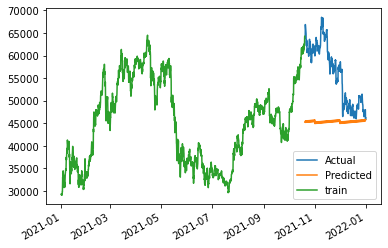

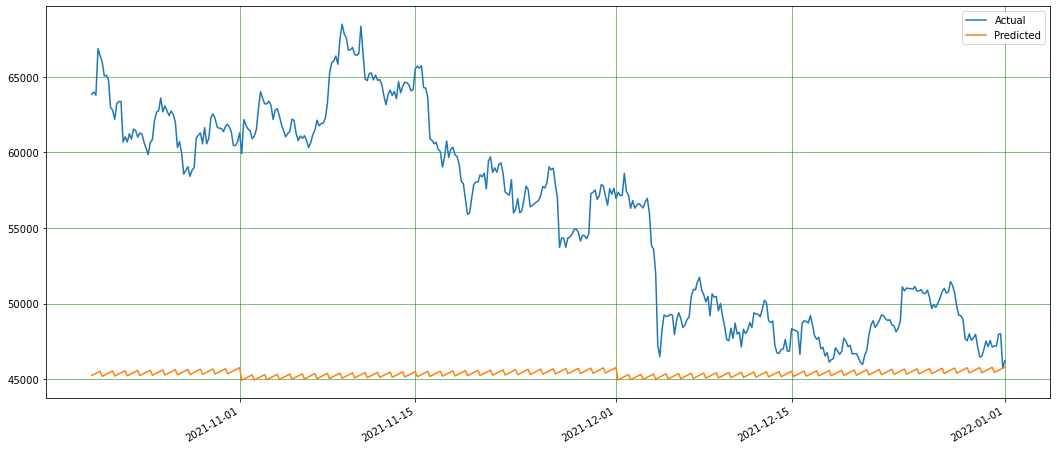

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [46]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [47]:
%%time
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 60.2 ms


RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [48]:
Model_R.best_params_

{'tol': 0.004, 'max_iter': 400, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [49]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  142389800.99148


# MAE

In [50]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  9981.2671


# RMSE

In [51]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  11932.71977


# MAPE

In [52]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.16673


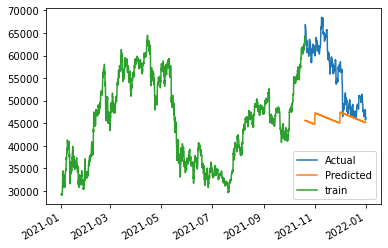

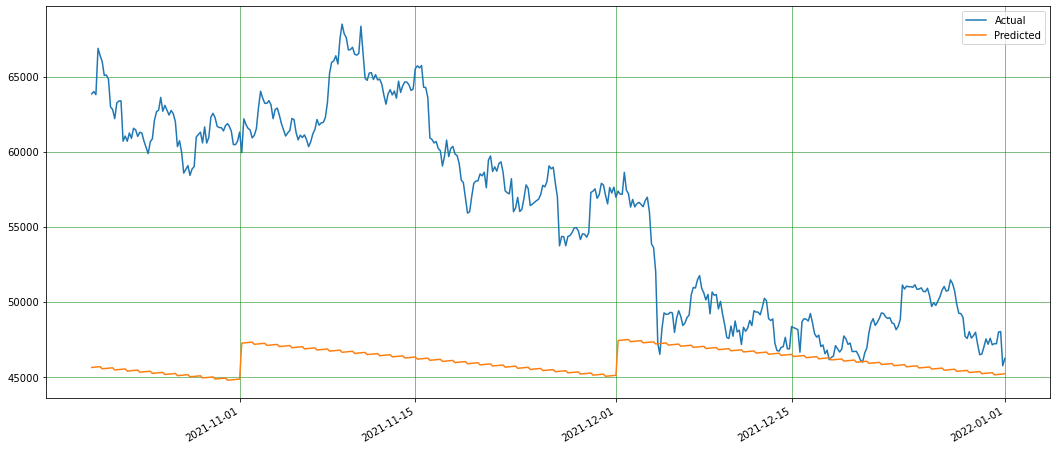

In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [54]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [55]:
%%time
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 1.96 s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [56]:
Model_R.best_params_

{'random_state': 40, 'min_samples_leaf': 50, 'max_depth': 20}

# Evaluation Measures on Test data

# MSE

In [57]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  42954895.97758


# MAE

In [58]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  5962.41866


# RMSE

In [59]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  6553.99847


# MAPE

In [60]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.10714


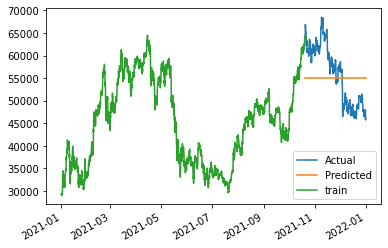

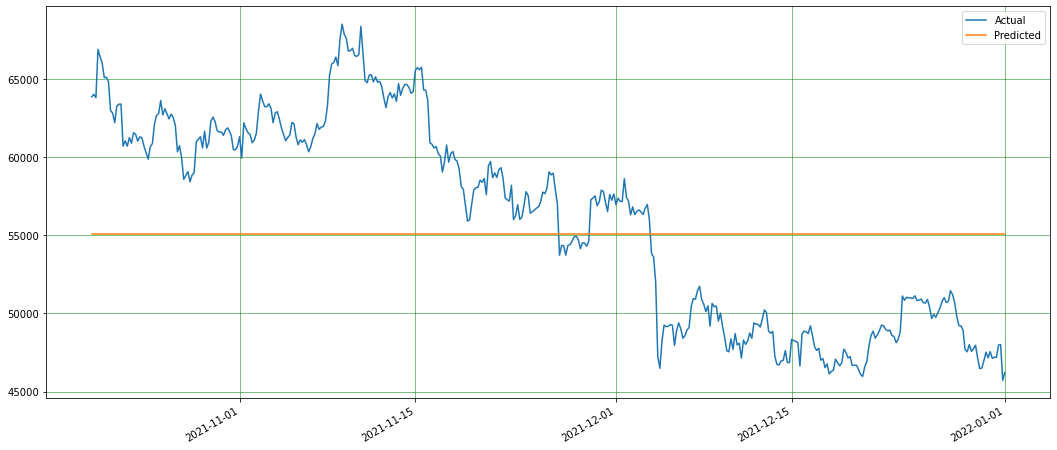

In [61]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [62]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [63]:
%%time
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 39.3 s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [64]:
Model_R.best_params_

{'n_estimators': 400, 'max_depth': 40, 'learning_rate': 0.1, 'base_score': 0.2}

# Evaluation Measures on Test data

# MSE

In [65]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  91103170.07473


# MAE

In [66]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  8146.58232


# RMSE

In [67]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  9544.79806


# MAPE

In [68]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.15204


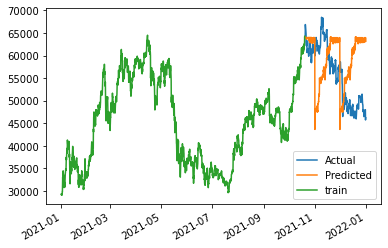

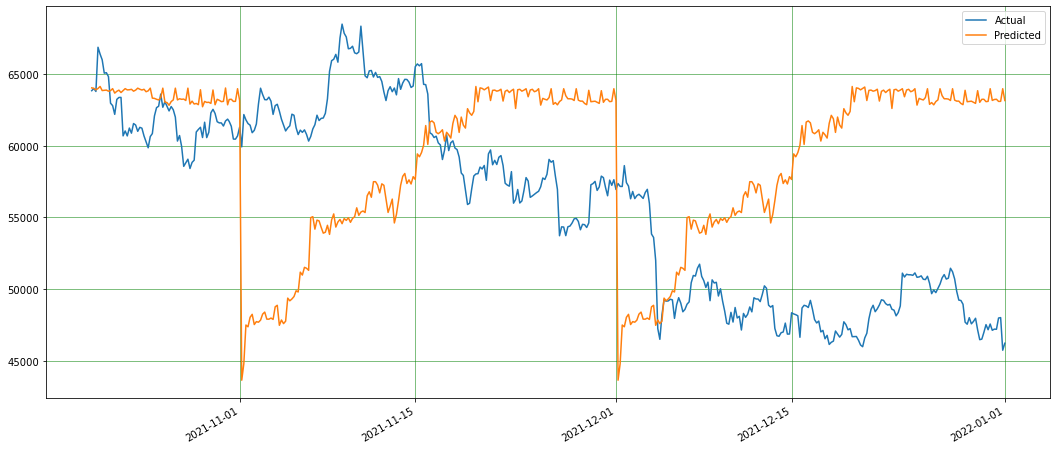

In [69]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [70]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["ARIMA Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["SARIMAX Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+---------------+
|          Model          |   MSE score   |
+-------------------------+---------------+
|     ARIMA Algorithm     |  13931407.352 |
|    SARIMAX Algorithm    |  28938281.043 |
|      MLP Algorithm      | 156300579.867 |
|     Ridge Algorithm     | 142389800.991 |
| Random Forest Algorithm |  42954895.978 |
|      XGB Algorithm      |  91103170.075 |
+-------------------------+---------------+




# Comparison of all algorithms Results on MAE score

In [71]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["ARIMA Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["SARIMAX Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 
print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|     ARIMA Algorithm     |  3045.56  |
|    SARIMAX Algorithm    |  4555.633 |
|      MLP Algorithm      | 10666.048 |
|     Ridge Algorithm     |  9981.267 |
| Random Forest Algorithm |  5962.419 |
|      XGB Algorithm      |  8146.582 |
+-------------------------+-----------+




# Comparison of all algorithms Results on RMSE score

In [72]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["ARIMA Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["SARIMAX Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|     ARIMA Algorithm     |  3732.48   |
|    SARIMAX Algorithm    |  5379.431  |
|      MLP Algorithm      | 12502.023  |
|     Ridge Algorithm     |  11932.72  |
| Random Forest Algorithm |  6553.998  |
|      XGB Algorithm      |  9544.798  |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [73]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["ARIMA Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["SARIMAX Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|     ARIMA Algorithm     |   0.055    |
|    SARIMAX Algorithm    |   0.085    |
|      MLP Algorithm      |   0.179    |
|     Ridge Algorithm     |   0.167    |
| Random Forest Algorithm |   0.107    |
|      XGB Algorithm      |   0.152    |
+-------------------------+------------+


